![Parked motorcycle](motorcycle.jpg)

You're working for a company that sells motorcycle parts, and they've asked for some help in analyzing their sales data!

They operate three warehouses in the area, selling both retail and wholesale. They offer a variety of parts and accept credit cards, cash, and bank transfer as payment methods. However, each payment type incurs a different fee.

The board of directors wants to gain a better understanding of wholesale revenue by product line, and how this varies month-to-month and across warehouses. You have been tasked with calculating net revenue for each product line and grouping results by month and warehouse. The results should be filtered so that only `"Wholesale"` orders are included.

They have provided you with access to their database, which contains the following table called `sales`:

## Sales
| Column | Data type | Description |
|--------|-----------|-------------|
| `order_number` | `VARCHAR` | Unique order number. |
| `date` | `DATE` | Date of the order, from June to August 2021. |
| `warehouse` | `VARCHAR` | The warehouse that the order was made from&mdash; `North`, `Central`, or `West`. |
| `client_type` | `VARCHAR` | Whether the order was `Retail` or `Wholesale`. |
| `product_line` | `VARCHAR` | Type of product ordered. |
| `quantity` | `INT` | Number of products ordered. | 
| `unit_price` | `FLOAT` | Price per product (dollars). |
| `total` | `FLOAT` | Total price of the order (dollars). |
| `payment` | `VARCHAR` | Payment method&mdash;`Credit card`, `Transfer`, or `Cash`. |
| `payment_fee` | `FLOAT` | Percentage of `total` charged as a result of the `payment` method. |

In [ ]:
SELECT product_line,
	TO_CHAR(date, 'Month') AS month,
	warehouse,
	SUM(total * (1 - payment_fee)) AS net_revenue
FROM sales
WHERE client_type = 'Wholesale'
GROUP BY product_line, month, warehouse
ORDER BY month, net_revenue DESC;

,product_line,month,warehouse,net_revenue
0,Engine,August,Central,9433.4823
1,Frame & body,August,Central,8571.4992
2,Frame & body,August,North,7819.9506
3,Suspension & traction,August,Central,5362.5924
4,Suspension & traction,August,North,4874.5125
5,Electrical system,August,North,4673.9880
6,Electrical system,August,Central,3095.2152
7,Braking system,August,Central,3009.0951
8,Braking system,August,West,2475.7128
9,Engine,August,North,2300.9580


   index           product_line      month warehouse  net_revenue
0      0                 Engine  August      Central    9433.4823
1      1           Frame & body  August      Central    8571.4992
2      2           Frame & body  August        North    7819.9506
3      3  Suspension & traction  August      Central    5362.5924
4      4  Suspension & traction  August        North    4874.5125


<Axes: xlabel='month,product_line'>

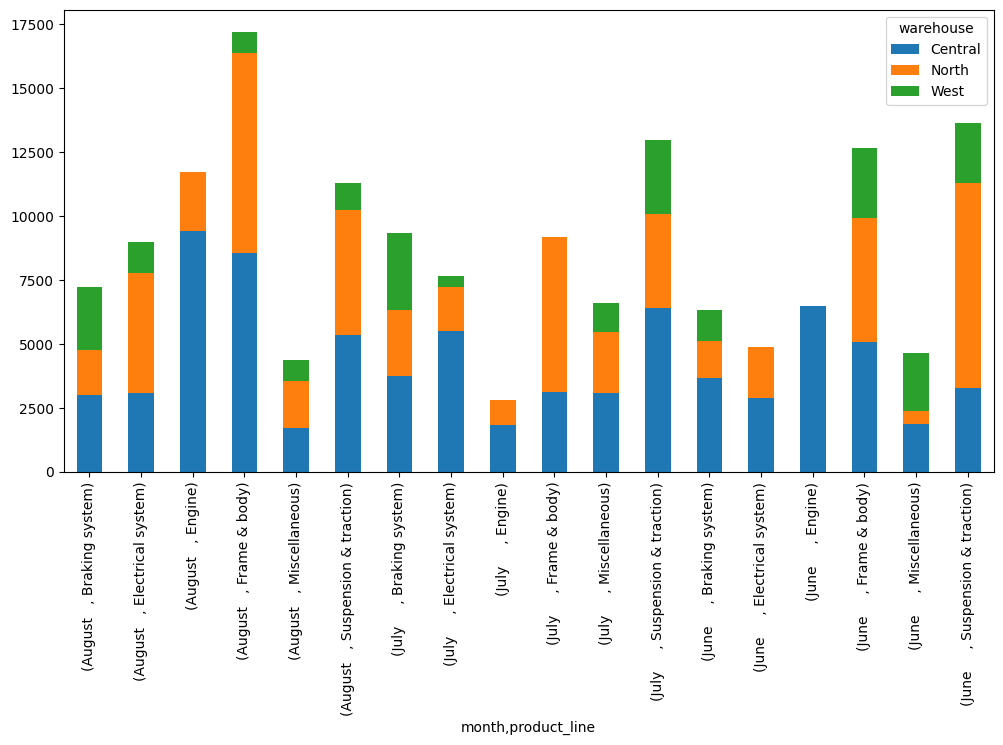

In [3]:
import pandas as pd

df = pd.read_csv("result.csv")

print(df.head())

pivot_df = df.pivot_table(
    index=["month","product_line"], 
    columns="warehouse", 
    values="net_revenue", 
    aggfunc="sum",
    fill_value=0
)

pivot_df.plot(kind="bar", stacked=True, figsize=(12,6))


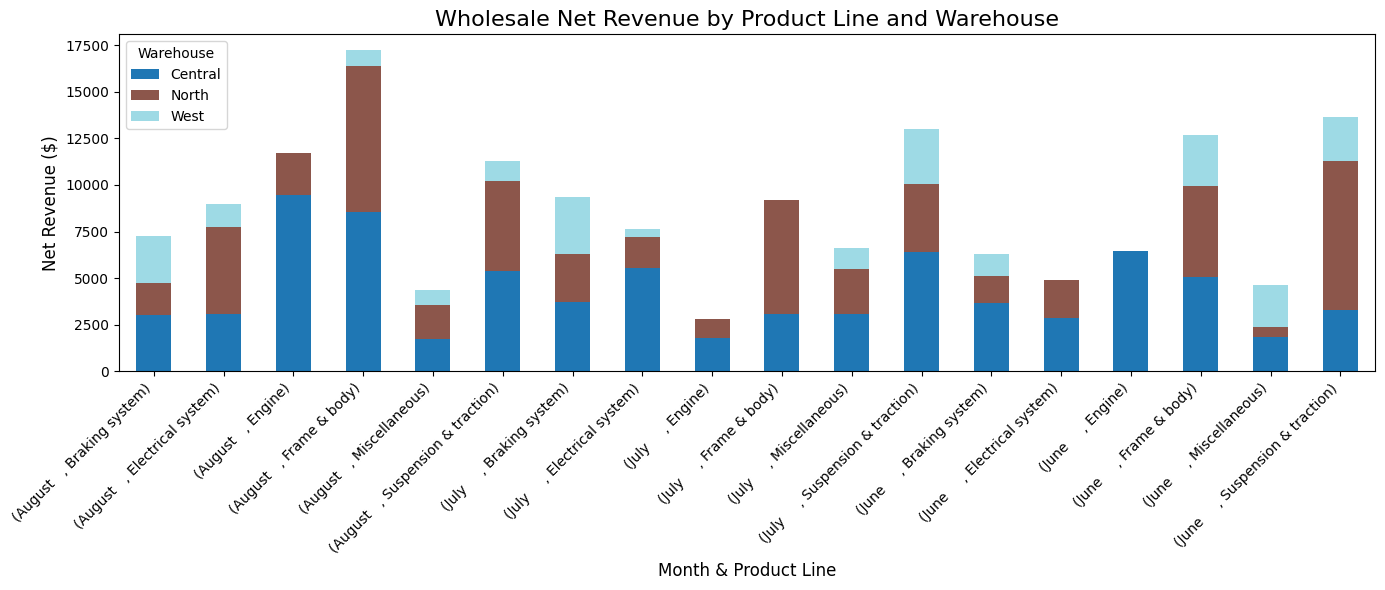

In [4]:
import matplotlib.pyplot as plt

# Create stacked bar chart
ax = pivot_df.plot(
    kind="bar", 
    stacked=True, 
    figsize=(14,6),
    colormap="tab20"   # nicer colors
)

plt.title("Wholesale Net Revenue by Product Line and Warehouse", fontsize=16)
plt.ylabel("Net Revenue ($)", fontsize=12)
plt.xlabel("Month & Product Line", fontsize=12)
plt.xticks(rotation=45, ha="right")   # rotate labels for readability
plt.legend(title="Warehouse")
plt.tight_layout()
plt.show()

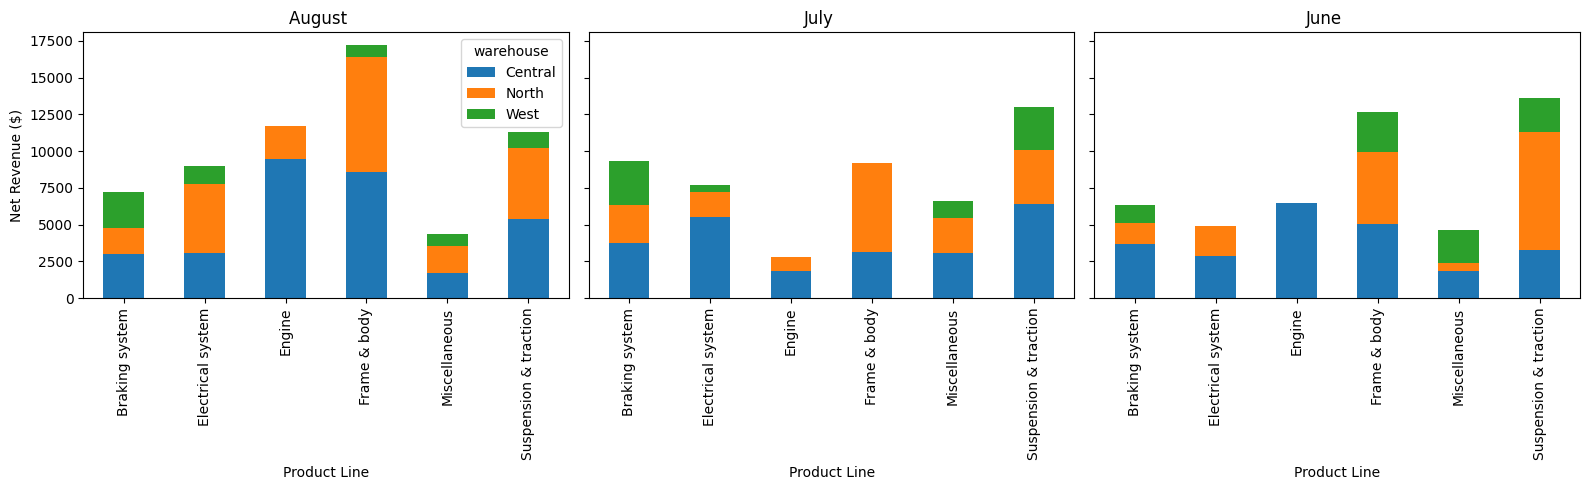

In [7]:
import matplotlib.pyplot as plt

months = df["month"].unique()

fig, axes = plt.subplots(nrows=1, ncols=len(months), figsize=(16,5), sharey=True)

for i, month in enumerate(months):
    temp = df[df["month"] == month].pivot_table(
        index="product_line",
        columns="warehouse",
        values="net_revenue",
        aggfunc="sum",
        fill_value=0
    )
    temp.plot(
        kind="bar", 
        stacked=True, 
        ax=axes[i],
        legend=(i==0)  # show legend only on first plot
    )
    axes[i].set_title(f"{month}")
    axes[i].set_ylabel("Net Revenue ($)")
    axes[i].set_xlabel("Product Line")

plt.tight_layout()
plt.show()

